今天我就带你使用 Python 自动化运营微博。关于今天的学习，希望你能达成以下的 3 个学习目标：

1、掌握 Selenium 自动化测试工具，以及元素定位的方法；

2、学会编写微博自动化功能模块：加关注，写评论，发微博；

3、对微博自动化做自我总结。

**Selenium 自动化测试工具**

当我们做 Web 自动化测试的时候，可以选用 Selenium 或者 Puppeteer 工具。我在第 10 篇的时候简单介绍过 Selenium 这个工具，你可以再回顾一下。Puppeteer 通过控制无头 Chrome 来完成浏览器的工作。这两个工具之间的区别在于：Selenium 更关注程序执行的流程本身，比如找到指定的元素，设置相应的值，然后点击操作。而 Puppeteer 是浏览者的视角，比如光标移动到某个元素上，键盘输入某个内容等。

今天我们继续使用 Selenium 工具自动化模拟浏览器，重点是学习对元素的定位。在第 10 篇讲到 Selenium WebDriver 的使用时，重点是对 HTML 进行获取和解析，然后通过 HTML 中的 XPath 进行提取，读取相应的内容。

在今天的实战里，我们需要在微博上自动登录，加关注，发评论，发微博等，这些操作都需要在浏览器上完成，所以我们可以使用 Webdriver 自带的元素定位功能。

如果我们想定位一个元素，可以通过 id、name、class、tag、链接上的全部文本、链接上的部分文本、XPath 或者 CSS 进行定位，在 Selenium Webdriver 中也提供了这 8 种方法方便我们定位元素。

1、通过 id 定位：我们可以使用 find_element_by_id() 函数。比如我们想定位 id=loginName 的元素，就可以使用 browser.find_element_by_id(“loginName”)。

2、通过 name 定位：我们可以使用 find_element_by_name() 函数，比如我们想要对 name=key_word 的元素进行定位，就可以使用 browser.find_element_by_name(“key_word”)。

3、通过 class 定位：可以使用 find_element_by_class_name() 函数。

4、通过 tag 定位：使用 find_element_by_tag_name() 函数。

5、通过 link 上的完整文本定位：使用 find_element_by_link_text() 函数。

6、通过 link 上的部分文本定位：使用 find_element_by_partial_link_text() 函数。有时候超链接上的文本很长，我们通过查找部分文本内容就可以定位。

7、通过 XPath 定位：使用 find_element_by_xpath() 函数。使用 XPath 定位的通用性比较好，因为当 id、name、class 为多个，或者元素没有这些属性值的时候，XPath 定位可以帮我们完成任务。

8、通过 CSS 定位：使用 find_element_by_css_selector() 函数。CSS 定位也是常用的定位方法，相比于 XPath 来说更简洁。

在我们获取某个元素之后，就可以对这个元素进行操作了，对元素进行的操作包括：

1. 清空输入框的内容：使用 clear() 函数；

2. 在输入框中输入内容：使用 send_keys(content) 函数传入要输入的文本；

3. 点击按钮：使用 click() 函数，如果元素是个按钮或者链接的时候，可以点击操作；

4. 提交表单：使用 submit() 函数，元素对象为一个表单的时候，可以提交表单；

了解 WebDriver 元素定位和功能之后，我们模拟一下微博的自动登录，具体代码如下：

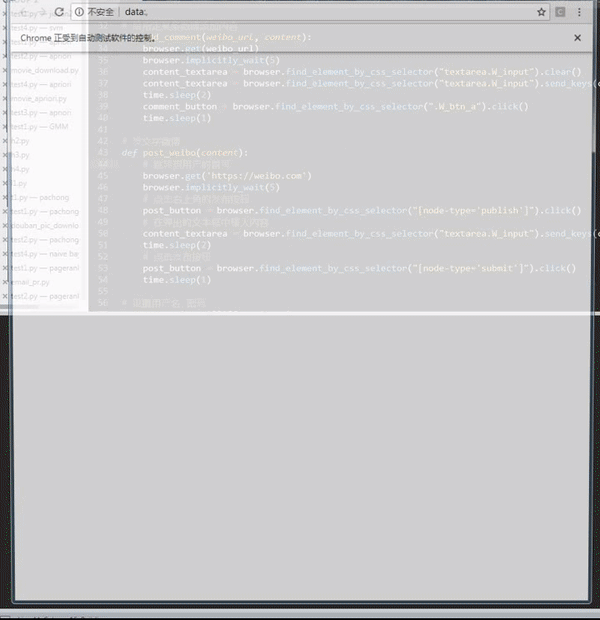

In [ ]:
from selenium import webdriver
import time
browser = webdriver.Chrome()
# 登录微博
def weibo_login(username, password):
     # 打开微博登录页
     browser.get('https://passport.weibo.cn/signin/login')
     browser.implicitly_wait(5)
     time.sleep(1)
     # 填写登录信息：用户名、密码
     browser.find_element_by_id("loginName").send_keys(username)
     browser.find_element_by_id("loginPassword").send_keys(password)
     time.sleep(1)
     # 点击登录
     browser.find_element_by_id("loginAction").click()
     time.sleep(1)
# 设置用户名、密码
username = 'XXXX'
password = "XXXX"
weibo_login(username, password)

需要说明的是，你需要填写自己的微博用户名和密码（对应 username 和 password）。

通过 HTML 标签分析，我们能看到 id=loginName 和 id=loginPassword 对应着用户名和密码的输入框，获取这两个元素之后，使用 send_keys() 设置用户名和密码，然后通过 id=loginAction 找到登录按钮，获取该元素，使用 click() 函数点击提交。

**微博自动化运营：加关注，写评论，发微博**

我们已经基本了解了 Selenium WebDriver 是如何获取指定元素，并且对元素进行操作的。下面我们撰写一下微博自动加关注，写评论，发微博的功能代码，具体模块如下：

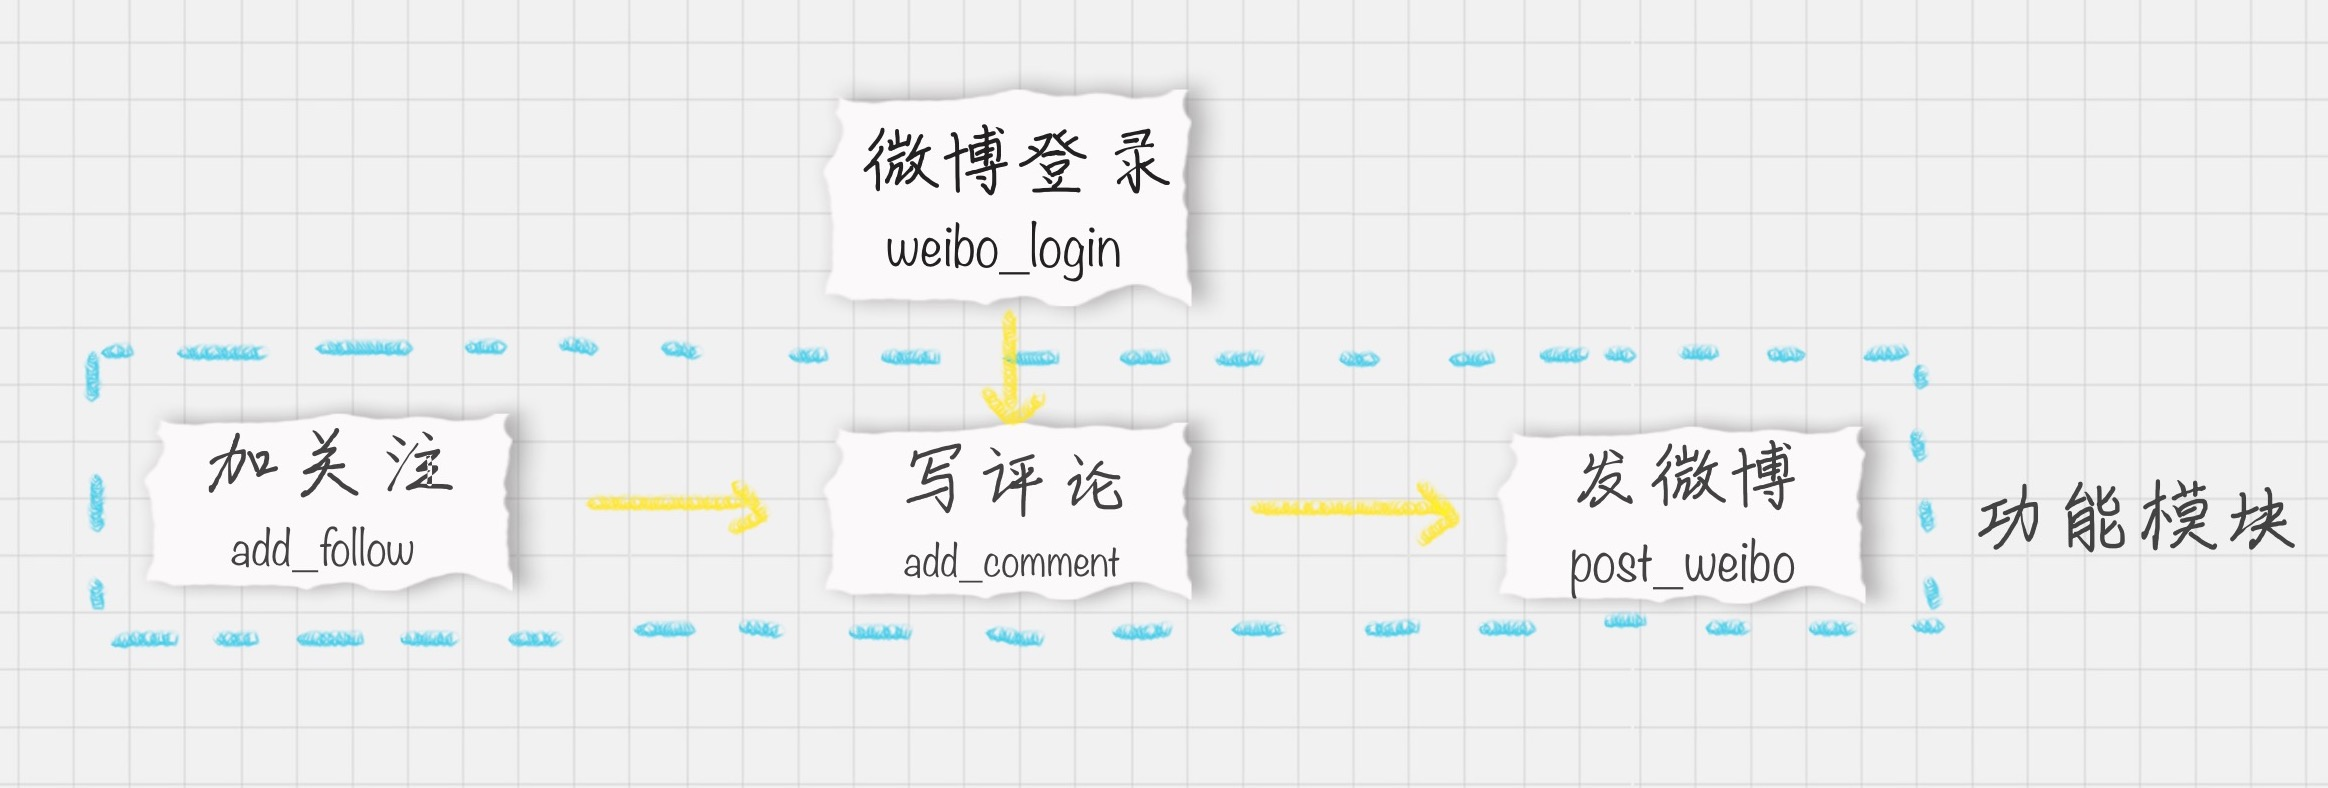

我们刚才完成了 weibo_login 微博登录模块的编写，现在来看下加关注的功能，具体代码如下：

In [ ]:

# 添加指定的用户
def add_follow(uid):
    browser.get('https://m.weibo.com/u/'+str(uid))
    time.sleep(1)
    #browser.find_element_by_id("follow").click()
    follow_button = browser.find_element_by_xpath('//div[@class="m-add-box m-followBtn"]')
    follow_button.click()
    time.sleep(1)
    # 选择分组
    group_button = browser.find_element_by_xpath('//div[@class="m-btn m-btn-white m-btn-text-black"]')
    group_button.click()
    time.sleep(1)
# 每天学点心理学UID
uid = '1890826225' 
add_follow(uid)

这里有两点你需要注意。第一点是如何找到用户的 UID 呢？在微博中，用户是用 UID 做唯一标识的。代码中我随机指定了一个 UID，你也可以指定其他的 UID。那么如何获取用户的 UID 的呢？你可以点击任何一个微博用户，查看他的 URL 链接，比如链接是https://weibo.com/u/5020181423 ，那么 u 后面的数字 5020181423 即为用户的 UID。你也可能遇到https://weibo.com/ixinli（每天学点心理学）这样的链接情况，那么通过查看他的粉丝即可以显示出 UID，比如这个微博的粉丝链接是https://weibo.com/1890826225/fans，那么 UID 对应的就是 1890826225。第二个需要注意的是使用 XPath 定位元素定位。我们如何找到“关注”这个按钮的元素标识呢？在 Chrome 浏览器中，在“关注”按钮用鼠标右键点击，选择“检查”查看这个元素对应的代码。通过分析，你能看到这个元素的 div 标签中的 class 属性为 m-add-box m-followBtn，那么你可以通过 find_element_by_xpath(’//div[@class=“m-add-box m-followBtn”]’) 获取这个元素。关注之后，程序会弹出选择分组的页面，如下所示。通过同样的方法，你可以查看“取消”这个按钮对应的 HTML 标签特征，然后通过 find_element_by_xpath 定位，使用 click() 函数提交。这样我们就关注了一个指定的用户。

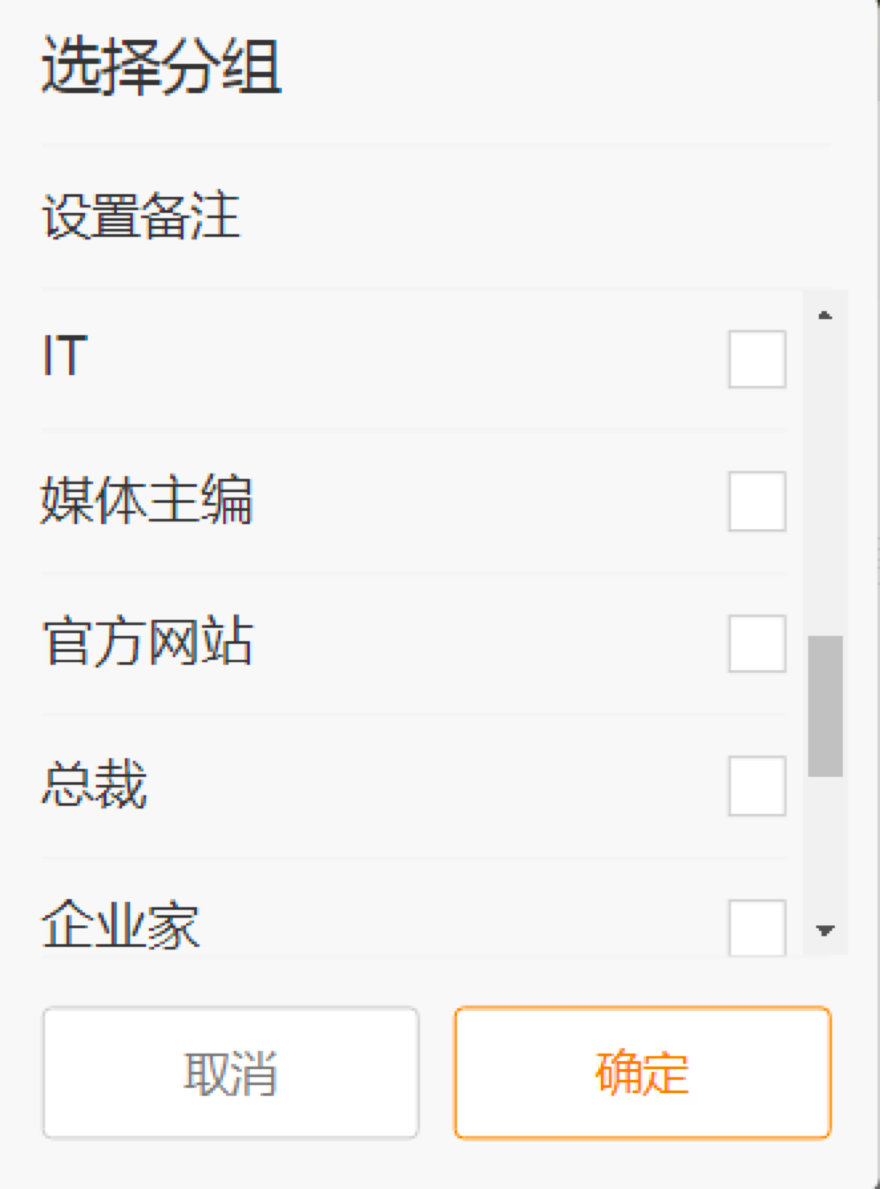

接下来，我们继续完成写评论和发微博的模块代码：

In [ ]:

# 给指定某条微博添加内容
def add_comment(weibo_url, content):
    browser.get(weibo_url)
    browser.implicitly_wait(5)
    content_textarea = browser.find_element_by_css_selector("textarea.W_input").clear()
    content_textarea = browser.find_element_by_css_selector("textarea.W_input").send_keys(content)
    time.sleep(2)
    comment_button = browser.find_element_by_css_selector(".W_btn_a").click()
    time.sleep(1)
 
# 发文字微博
def post_weibo(content):
    # 跳转到用户的首页
    browser.get('https://weibo.com')
    browser.implicitly_wait(5)
    # 点击右上角的发布按钮
    post_button = browser.find_element_by_css_selector("[node-type='publish']").click()
    # 在弹出的文本框中输入内容
    content_textarea = browser.find_element_by_css_selector("textarea.W_input").send_keys(content)
    time.sleep(2)
    # 点击发布按钮
    post_button = browser.find_element_by_css_selector("[node-type='submit']").click()
    time.sleep(1)
# 给指定的微博写评论
weibo_url = 'https://weibo.com/1890826225/HjjqSahwl'
content = 'Gook Luck!好运已上路！'
# 自动发微博
content = '每天学点心理学'
post_weibo(content)

这个环节里，同样也有一些需要说明的地方。

如何找到某条微博的链接呢？你可以在某个用户微博页面中点击时间的链接，这样就可以获取这条微博的链接。

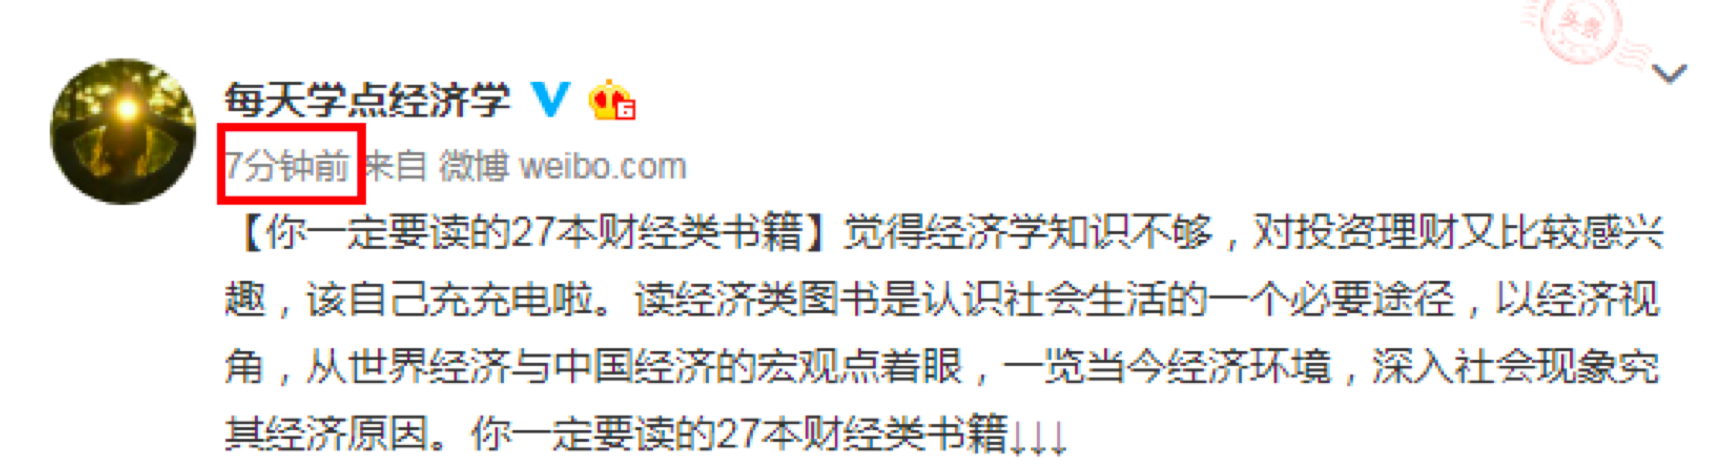

如何定位评论区中输入框元素的位置呢？

我们将鼠标移动到评论框中，在 Chrome 浏览器中点击右键“查看”，可以看到这个 textarea 的 class 是 W_input，使用 find_element_by_css_selector 函数进行定位，然后通过 send_keys 设置内容。

最后就是发微博的流程。我们可以观察到点击微博页面的右上角的按钮后，会弹出一个发微博的文本框，设置好内容，点击发送即可。发微博的函数和写评论的代码类似，使用 find_element_by_css_selector() 函数定位，通过 send_keys() 设置内容的设置，最后通过 click() 发送。

上面的代码你可以自己模拟下，在实际运行过程中，你可能会遇到各种情况，比如下面这种情况：

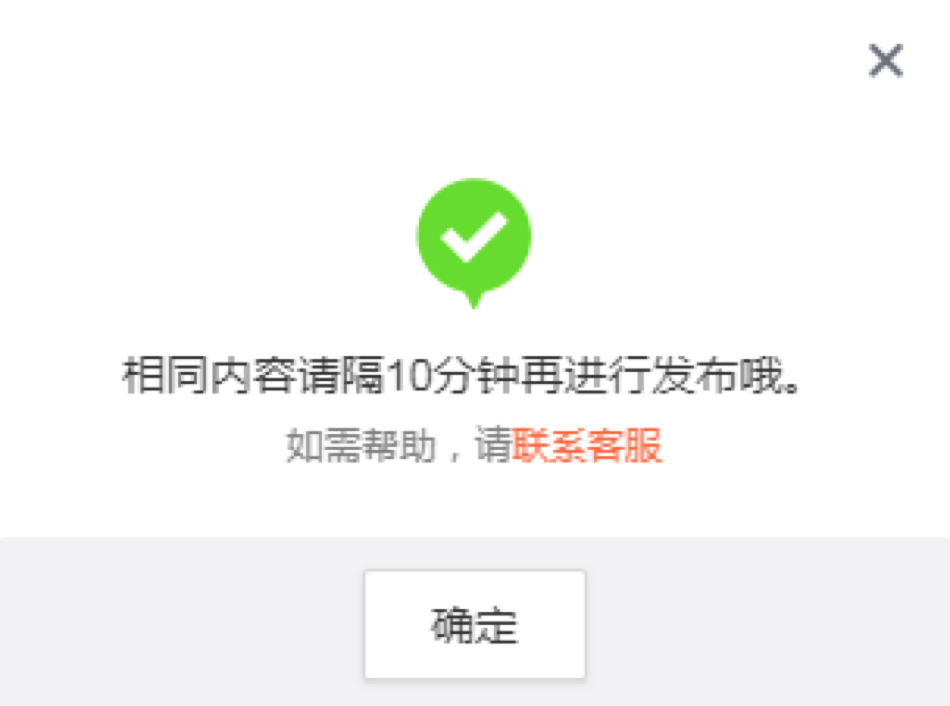

微博自动化运营是一个系统的工程，需要考虑到各种情况，比如相同的内容发布需要间隔 10 分钟以上；关注了一个用户之后，就无法对他二次关注，可以判断是否已经关注过，再关注操作；因为操作频繁导致需要输入验证码的情况等。

另外，微博自动化运营只是自动化运营的开始，实际上在微信上我们也可以做同样的操作。比如监听微信群的消息，自动发微信等。实际要考虑的问题比微博的要复杂。

**总结**

今天我带你进行了微博自动化运营的实战，通过实战你对使用 Selenium WebDriver 应该更有了解，包括如何定位指定的元素，对元素进行各种操作等。同时我们使用了 implicitly_wait 函数以及 time.sleep() 函数让浏览器和程序等待一段时间，完成数据加载之后再进行后续的操作，这样就避免了数据没有加载完，导致获取不到指定元素的情况。

通过三个模块（加关注、写评论、发微博）的编写，你能了解如何使用工具完成自动化的操作。在实际的过程中，可能会遇到各种复杂情况，这些都需要你在运行过程中慢慢体会。

自动化运营是个细致的活儿，我在之前的加餐文章中也提到过。如果真的想要实现自动化，还需要解决反垃圾的清理问题等，你可以再回顾一下。

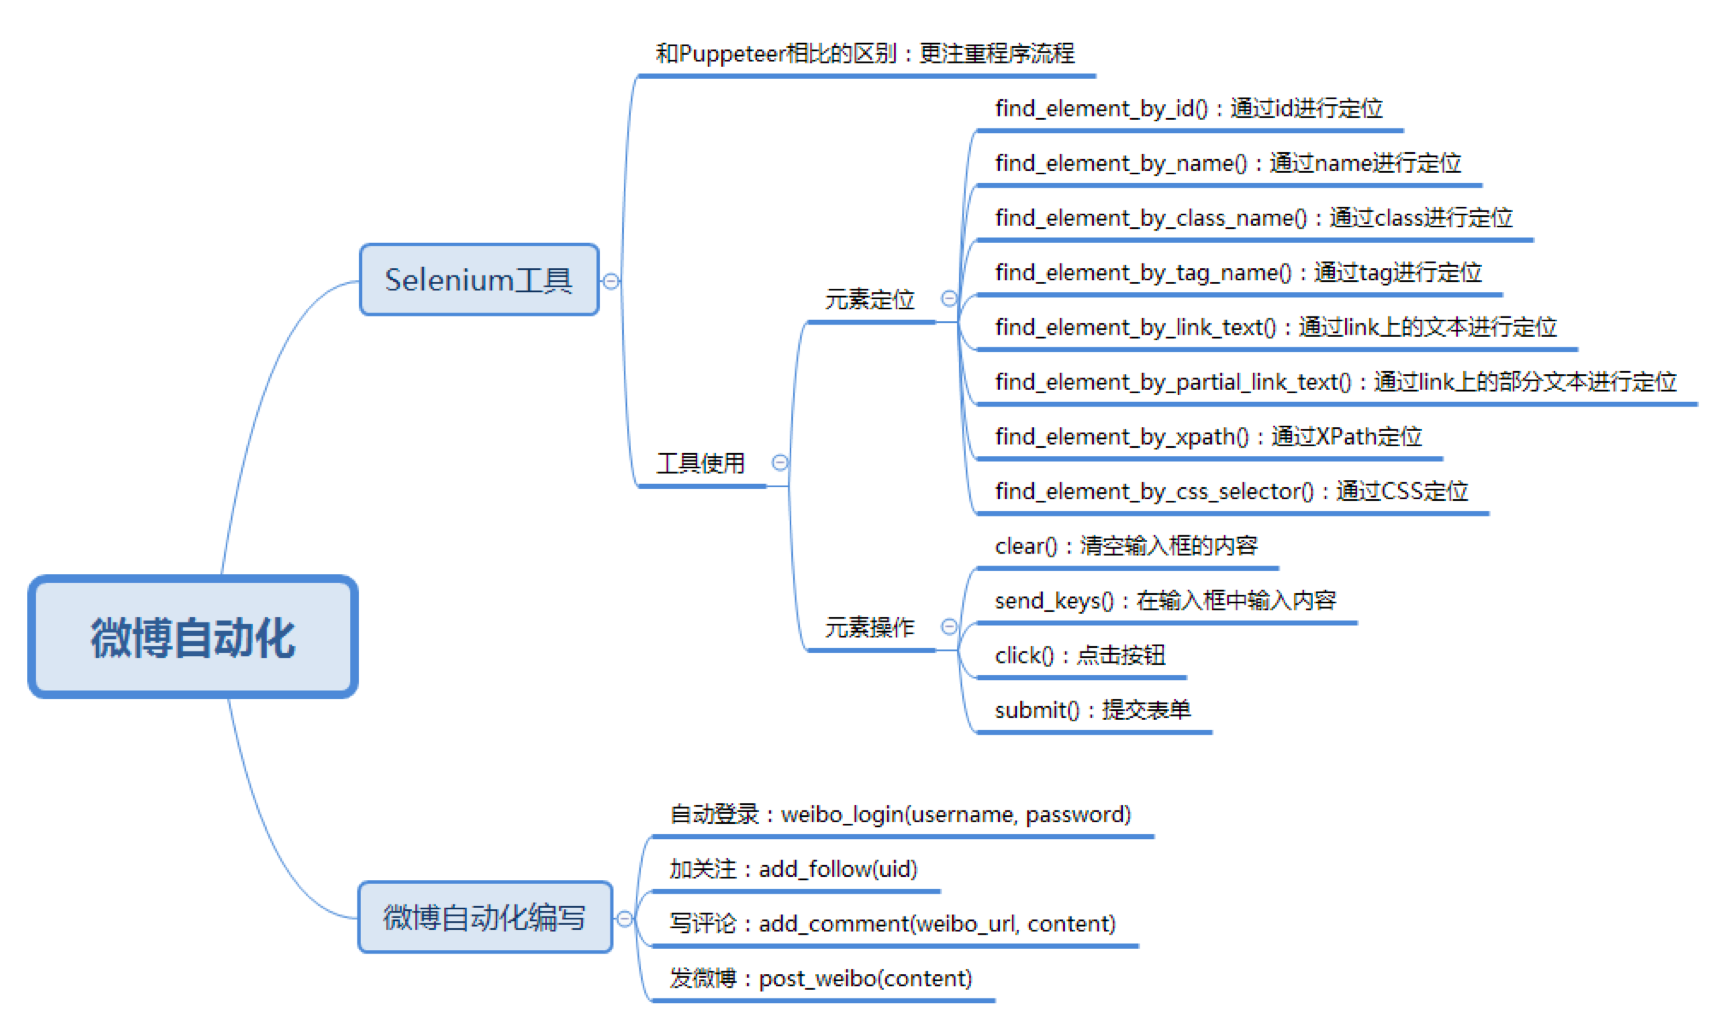

最后留两道题吧。今天我们对微博加关注这一模块编写了代码，同样我们也可能会对某个指定用户的 UID 做取消关注的操作，请你使用今天讲的元素定位和操作功能，编写相应的代码。

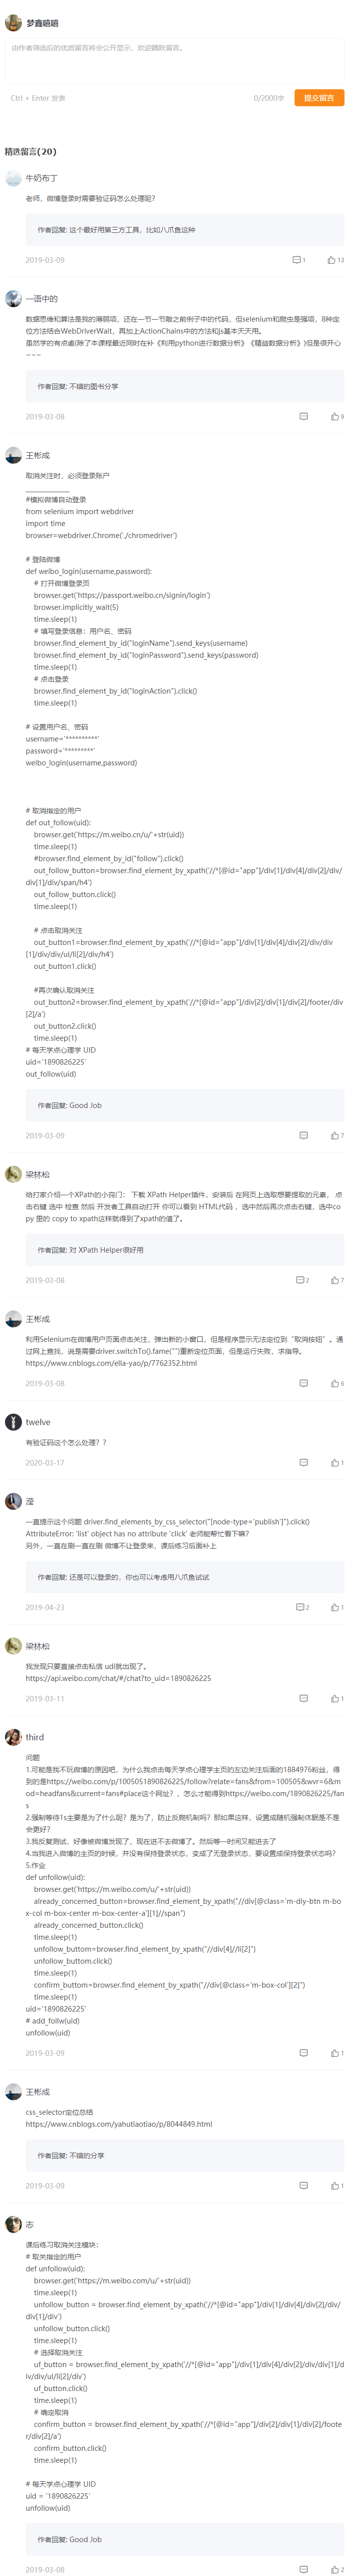